## Descripción del proyecto

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

##  Importar las librerias necesarias

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
%config InlineBackend.figure_format = 'retina'

## Importar los documentos


In [3]:
# Importar los documentos
df_contract=pd.read_csv('/datasets/final_provider/contract.csv')
df_internet=pd.read_csv('/datasets/final_provider/internet.csv')
df_personal=pd.read_csv('/datasets/final_provider/personal.csv')
df_phone=pd.read_csv('/datasets/final_provider/phone.csv')

## EDA

In [4]:
# Imprimir cuantos usuarios unicos hay en cada documento
print('customers en contrato:',len(df_contract['customerID'].unique()))
print('customers en internet:',len(df_internet['customerID'].unique()))
print('customers en personal:',len(df_personal['customerID'].unique()))
print('customers en phone:',len(df_phone['customerID'].unique()))

customers en contrato: 7043
customers en internet: 5517
customers en personal: 7043
customers en phone: 6361


In [5]:
# Verificar si hay valores ausentes
print(df_contract.info())
print()
print(df_internet.info())
print()
print(df_personal.info())
print()
print(df_phone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 

In [6]:
# Debido a que los dfs contrato y personal tienen la mayor cantidad de clientes unicos y que no existen 
# valores ausentes en ningun dataframe, asumiré por el momento que los usuarios que no estan en df_internet
# son clientes de la empresa pero no cuentan con servicio de internet, lo mismo con el df_phone

# Aplicar join a los 4 dataframes

df_resultado = pd.merge(df_contract,df_personal, on='customerID', how='left')
df_resultado= pd.merge(df_resultado,df_internet, on='customerID', how='left')
df_resultado= pd.merge(df_resultado,df_phone, on='customerID', how='left')


In [7]:
#Convertir la columna BeginDate en datime, usar coerce para reeplazar cualquier valor extraño por NaT
df_resultado['BeginDate'] = pd.to_datetime(df_resultado['BeginDate'], errors='coerce')
# Convertir la columna EndDate en datime, usar coerce para reeplazar cualquier valor extraño por NaT
df_resultado['EndDate'] = pd.to_datetime(df_resultado['EndDate'], errors='coerce')

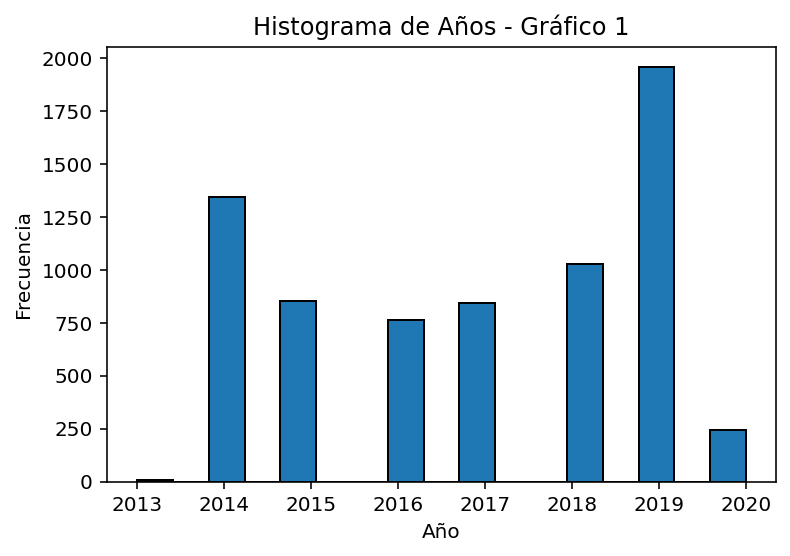

In [8]:
# Extraer el año de la columna datetime y crear el histograma
plt.hist(df_resultado['BeginDate'].dt.year, bins='auto', edgecolor='black')

# Configurar el título y las etiquetas del eje
plt.title('Histograma de Años - Gráfico 1')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

In [9]:
# Calcular un campo que refiera a la duracion de un cliente con el servicio
df_resultado['duración']=(df_resultado['EndDate']-df_resultado['BeginDate']).dt.days

In [10]:
# Crear campo target donde se diferencia los clientes que se fueron con los que no (permanecen:1, se fueron:0)
df_resultado['target'] = df_resultado['duración'].apply(lambda x: 1 if pd.isna(x) else 0)


In [11]:
# Ver los valores de las demas caracteristicas que tienen valores ausentes
print('InternetService :',df_resultado['InternetService'].unique())
print('OnlineSecurity  :',df_resultado['OnlineSecurity'].unique())
print('OnlineBackup    :',df_resultado['OnlineBackup'].unique())
print('DeviceProtection:',df_resultado['DeviceProtection'].unique())
print('TechSupport     :',df_resultado['TechSupport'].unique())
print('StreamingTV     :',df_resultado['StreamingTV'].unique())
print('StreamingMovies :',df_resultado['StreamingMovies'].unique())
print('MultipleLines   :',df_resultado['MultipleLines'].unique())

InternetService : ['DSL' 'Fiber optic' nan]
OnlineSecurity  : ['No' 'Yes' nan]
OnlineBackup    : ['Yes' 'No' nan]
DeviceProtection: ['No' 'Yes' nan]
TechSupport     : ['No' 'Yes' nan]
StreamingTV     : ['No' 'Yes' nan]
StreamingMovies : ['No' 'Yes' nan]
MultipleLines   : [nan 'No' 'Yes']


In [12]:
# Como se puede ver el campo duracion (producto de BeginDate y EndDate ) esta directamente relacionado al target
# cuando duración es NaN el target es 1 y cuando es diferente de NaN el target es 0. Lo que significa
# que de incluirlo en algun modelo causaría sobreajuste y se le daría una alta importancia a duración y a EndDate que 
# no deberian tener.
# Por lo tanto no tomaré en cuenta los campos de fecha y duración

df_resultado.drop(['BeginDate','EndDate','duración'], axis=1, inplace=True)

In [13]:
# Hay 11 registros donde no aparece el TotalCharges y en su lugar hay un tab, los borraré porque es una cantidad
# muy baja
df_resultado.drop(df_resultado.query('TotalCharges==" "').index, inplace=True)

# Ademas convertir dicho campo a numeric
df_resultado['TotalCharges'] = pd.to_numeric(df_resultado['TotalCharges'])

In [14]:
# Los campos provenientes de df_internet tienen valores nulos si es que los clientes no contaban con el servicio,
# por lo tanto rellenaré los valores nulos con 'No'

df_resultado['InternetService']=df_resultado['InternetService'].fillna('No')
df_resultado['OnlineSecurity']=df_resultado['OnlineSecurity'].fillna('No')
df_resultado['OnlineBackup']=df_resultado['OnlineBackup'].fillna('No')
df_resultado['DeviceProtection']=df_resultado['DeviceProtection'].fillna('No')
df_resultado['TechSupport']=df_resultado['TechSupport'].fillna('No')
df_resultado['StreamingTV']=df_resultado['StreamingTV'].fillna('No')
df_resultado['StreamingMovies']=df_resultado['StreamingMovies'].fillna('No')

# También incluyo a MultipleLines
df_resultado['MultipleLines']=df_resultado['MultipleLines'].fillna('No')

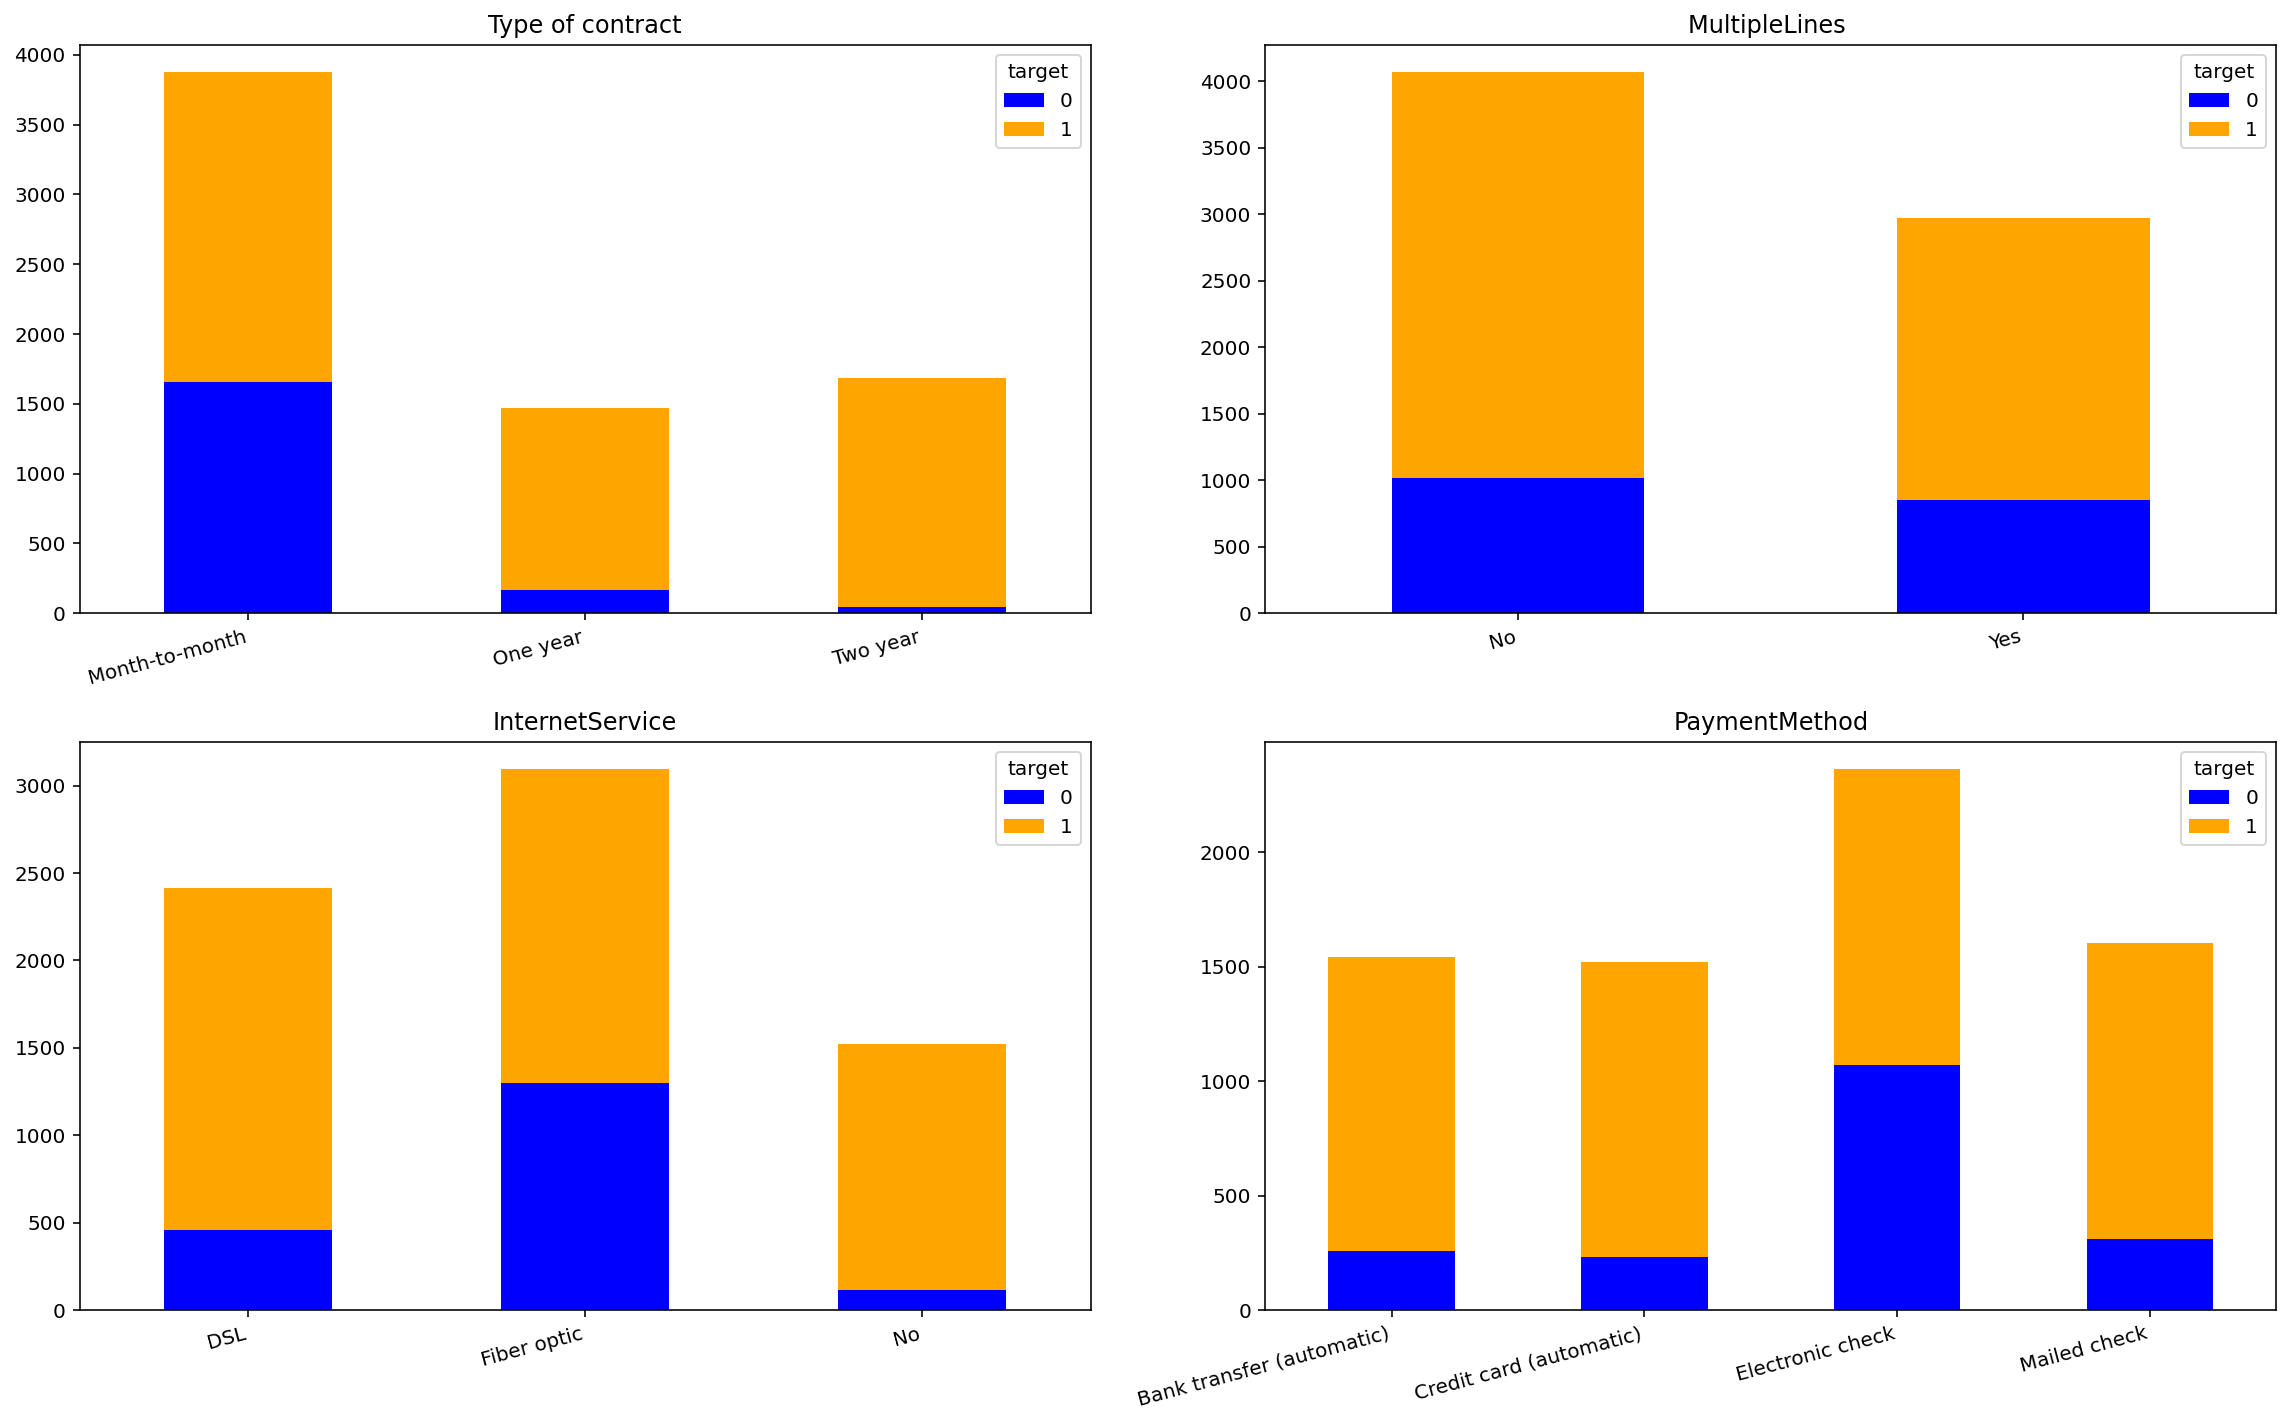

In [15]:
# Grafico para evaluar algunos campos respecto al target

fig, axs = plt.subplots(2, 2, figsize=(16, 10), gridspec_kw=dict(width_ratios=(1, 1), height_ratios=(1, 1)))

ax=axs[0][0]

dft = df_resultado.groupby(['Type', 'target'])['target'].count().unstack()
# Crear el gráfico de barras apiladas
dft.plot(kind='bar', stacked=True, color=['blue', 'orange'], ax=ax)
# Configurar el título y las etiquetas del eje
ax.set_title('Type of contract')
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
ax.set_xlabel('')
#ax.set_ylabel('Frecuencia')


ax = axs[0][1]

dft = df_resultado.groupby(['MultipleLines', 'target'])['target'].count().unstack()
# Crear el gráfico de barras apiladas
dft.plot(kind='bar', stacked=True, color=['blue', 'orange'], ax=ax)
# Configurar el título y las etiquetas del eje
ax.set_title('MultipleLines ')
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
ax.set_xlabel('')

ax = axs[1][0]

dft = df_resultado.groupby(['InternetService', 'target'])['target'].count().unstack()
# Crear el gráfico de barras apiladas
dft.plot(kind='bar', stacked=True, color=['blue', 'orange'], ax=ax)
# Configurar el título y las etiquetas del eje
ax.set_title('InternetService')
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
ax.set_xlabel('')



ax = axs[1][1]

dft = df_resultado.groupby(['PaymentMethod', 'target'])['target'].count().unstack()
# Crear el gráfico de barras apiladas
dft.plot(kind='bar', stacked=True, color=['blue', 'orange'], ax=ax)
# Configurar el título y las etiquetas del eje
ax.set_title('PaymentMethod')
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
ax.set_xlabel('')
#ax.set_ylabel('Frecuencia')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

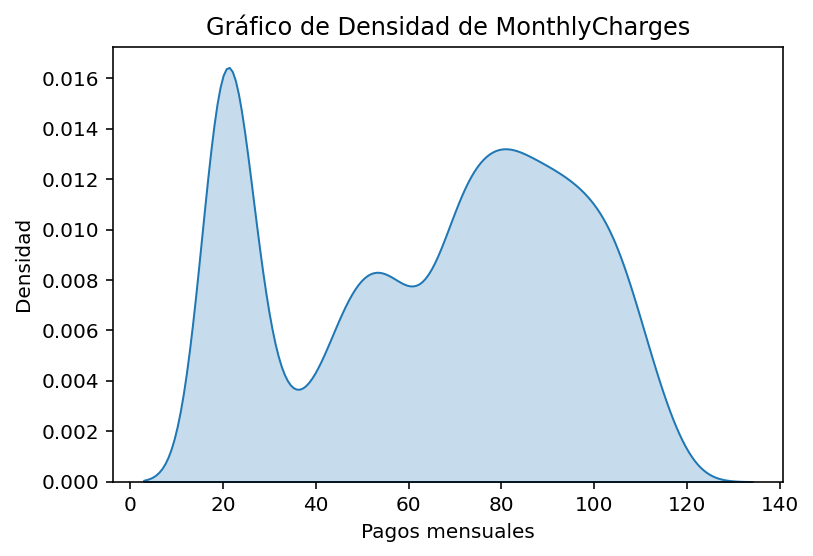

In [48]:
# Gráfico de densidad de MonthlyCharges

sns.kdeplot(df_resultado['MonthlyCharges'], shade=True)


plt.title('Gráfico de Densidad de MonthlyCharges')
plt.xlabel('Pagos mensuales')
plt.ylabel('Densidad')


plt.show()

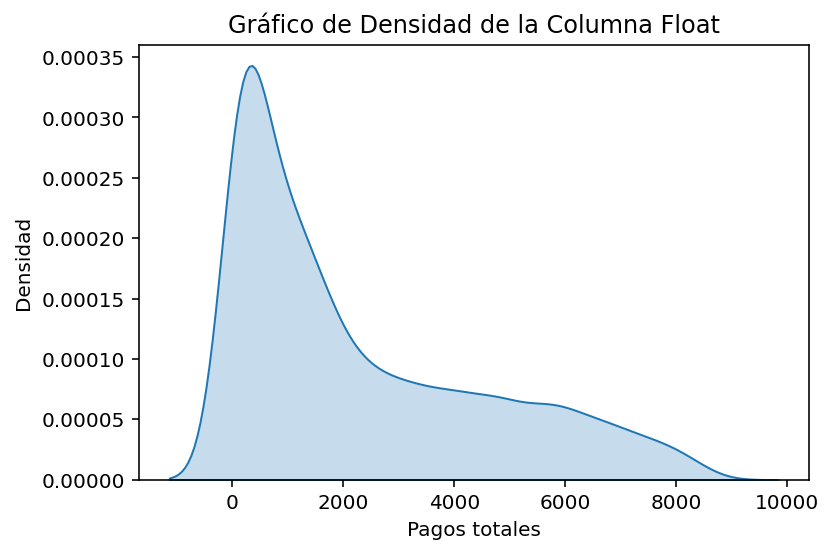

In [22]:
# Grafico de densidad de TotalCharges

sns.kdeplot(df_resultado['TotalCharges'], shade=True)

plt.title('Gráfico de Densidad de TotalCharges')
plt.xlabel('Pagos totales')
plt.ylabel('Densidad')

# Muestra el gráfico de densidad
plt.show()

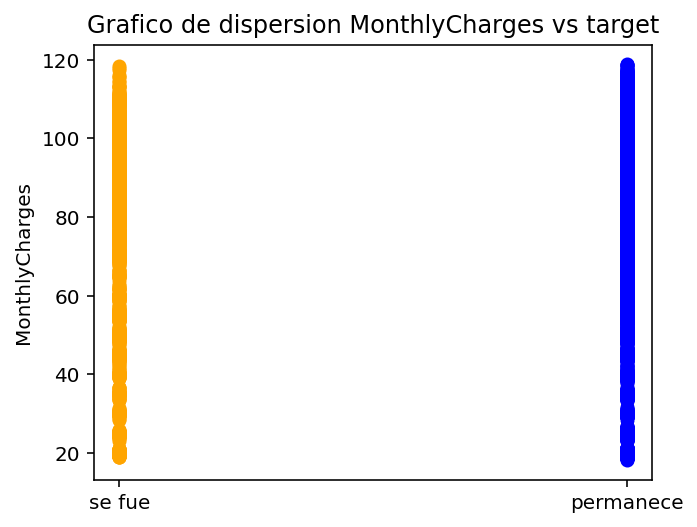

In [47]:
# Gráfico de disperción de TotalCharges vs target

plt.figure(figsize=(5, 4))
# Dividir el DataFrame en dos basado en los valores del target
grupo_A = df_resultado[df_resultado['target'] == 1]
grupo_B = df_resultado[df_resultado['target'] == 0]

# Crear un gráfico de dispersión para cada grupo
plt.scatter(grupo_A['target'], grupo_A['MonthlyCharges'], label='Valor A', color='blue')
plt.scatter(grupo_B['target'], grupo_B['MonthlyCharges'], label='Valor B', color='orange')

# Configurar etiquetas y leyenda
plt.title('Grafico de dispersion MonthlyCharges vs target')
plt.ylabel('MonthlyCharges')
plt.xticks([1, 0], ['permanece', 'se fue'])
#plt.legend()

# Mostrar el gráfico
plt.show()



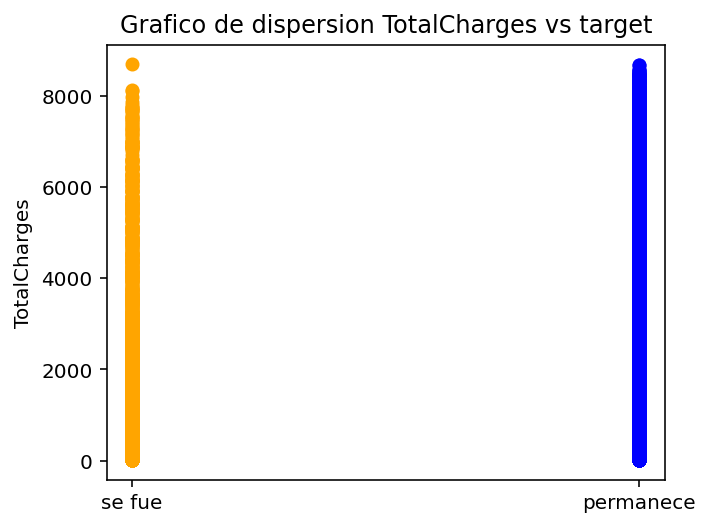

In [49]:
# Gráfico de disperción de TotalCharges vs target

plt.figure(figsize=(5, 4))
# Dividir el DataFrame en dos basado en los valores del target
grupo_A = df_resultado[df_resultado['target'] == 1]
grupo_B = df_resultado[df_resultado['target'] == 0]

# Crear un gráfico de dispersión para cada grupo
plt.scatter(grupo_A['target'], grupo_A['TotalCharges'], label='Valor A', color='blue')
plt.scatter(grupo_B['target'], grupo_B['TotalCharges'], label='Valor B', color='orange')

# Configurar etiquetas y leyenda
plt.title('Grafico de dispersion TotalCharges vs target')
plt.ylabel('TotalCharges')
plt.xticks([1, 0], ['permanece', 'se fue'])
#plt.legend()

# Mostrar el gráfico
plt.show()


In [43]:
# Por último verificar el desiquilibro de clases 
df_resultado['target'].value_counts()/df_resultado.shape[0]

1    0.734215
0    0.265785
Name: target, dtype: float64

## Conclusiones
1. Existen valores ausenten en el conjunto de dataset proporcionados, por otro lado, individualmente cada dataset no tiene valores ausentes.


2. Las caracteríticas BeginDate, EndDate y TotalCharges necesitaban un cambio de tipo de dato.


3. Las características BeginDate y EndDate fueron eliminadas. BeginDate por no ser relevante y EndDate por ser peligrosamente muy proporcional al target y poder causar un sobreajuste. Todo esto debido a que el dataset esta muy desfasado en el tiempo (muy antiguo).


4. No existe tendencia de nuevos clientes a lo largo de los años (gráfico 1).


5. Los valores ausente en cuanto a servicios de internet refiere es causado por que son los clientes que trabajan con Interconnect pero no cuentan con servicio de internet. Es por eso que los valores nulos fueron rellenados con 'No' que refiere a que no cuentan con el servicio.


6. Se eliminaron los registros que tenían valores extraños, por ejemplo, en TotalCharges habian valores string cuando todos debian ser numericos.


7. Evaluando el target y teniendo en cuenta que (permanecen:1, se fueron:0):
    7.1 La mayoria de clientes que se van tenían un tipo de contrato month-to-month, al final del proyecto se podrá decir si está feature es significativa y si es buena estrategia tratar de pasar a los clientes a otro tipo de contrato mediante promociones.
    7.2 De la misma manera, hay una menor fuga de clientes cuando el método de pago es automamitco (credit card o bank transfer).
    
    
8. El diagrama de disperción entre TotalCharges vs target  y MonthlyCharges vs target indica que no existe una correlación visible entre ellos.


9. Efectivamente existe un desequilibrio de clases de 73%(1) y 27%(0).

10. Se trata de un problema de clasificación.

## Plan de acción
Trabajar a partir de df_resultado:

1. Usando XGBoost evaluar la importancia de los features
2. Aplicar algun encoder y scaler (para modelos que necesiten).
3. Arreglar el desbalance de clases.
4. Crear modelos con random forest, Regresión Logística , XGBoost o CatBoost y redes neuronales.
5. Evaluar los modelos con métricas de clasificacion binaria como AUC-ROC, f1-score, Accuracy y Precision.